# Session 4: Geometric operation and Data classification
*Written by Men Vuthy, 2021*

---

#### Overview:

In this session, we are going to learn about operating geometric functions (i.e. intersection, symetrical difference, union, and difference) and how to classify the data based on specific criteria and map classifiers. These operations are very common in GIS; however, here we will do it Python programming language. It is important to know how it can be done since it will help you deal with large amount of data or big-data.

After this session, you will understand how to:

* conduct overlay analysis such as clipping or intersection, union, difference, etc
* conduct a loop operation of overlay analysis
* aggregate the geometries
* classify data features based on standard classification methods
* create custom classifier for data feature classification

**Downloading dataset**

The data used in this lesson is retrieved from the book titled "[Hands-On Data Visualization](https://handsondataviz.org)". The data shows the location of bicycle theft in London reported by the [Metropolitan Police Service](https://data.police.uk/data/). Visualize the interactive map of bicycle theft [here](https://handsondataviz.github.io/leaflet-heatmap/). The data source is given as a list of coordinates (lat and lon) of location where the bicycles were stolen in a csv file format. Thus, to conduct geometric operation, we need to convert these coordinates into a GeoDataFrame with an appropriate coordinate reference system. 

- [Bicycle theft in London in January-July 2020](https://github.com/HandsOnDataViz/leaflet-heatmap)

![bicycle-theft](img-markdown/bicycle-theft.png)

#### 1. Geometry operation

#### a. Spatial overlay analysis

Geometric operation such as interection, union or difference is usually known as overlay analysis. The overlay analysis is one of the spatial GIS operations which aims at creating a new layer based on the overlaying shapes of two geometries and on the attribute information. In other words, it allows you to identify the relationships between two polygon features that share all or part of the same area.

Typical overlay operations are:

![overlay](img-markdown/overlay_operations.png)


Source: [Vector Spatial Analysis - QGIS](https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/vector_spatial_analysis_buffers.html#figure-overlay-operations)

Let's get started to work on practial examples. 

From now, we will learn how to conduct overlay operations on our data of bicycle theft in London. The question is "*How many and where the bicycle theft in the southern area of Thames river in London?*"

In [1]:
# import necessary module
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
%matplotlib inline

# Let's enable speedups to make queries faster
shapely.speedups.enable()

Let’s first read the border data and see how it looks:

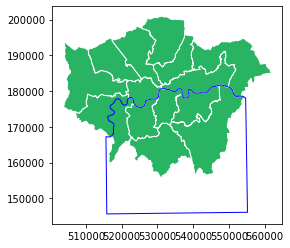

In [2]:
# Set file paths
border_fp = "data/greater_london_const_region.shp"
south_river_fp = "data/south-area.shp"

# Read files
border = gpd.read_file(border_fp)
south_river = gpd.read_file(south_river_fp)

# Plot the layers
ax = border.plot(facecolor='#28B463', edgecolor='white')
south_river.plot(ax=ax, facecolor='None', edgecolor='blue')

plt.show()

The green area is London city which we want to use for conducting overlay analysis, while the blue polygon is the boundary of the southern area of Thames river. 

We will clip the green area within the blue polygon by using a function called [overlay()](https://geopandas.org/docs/user_guide/set_operations.html) from `geopandas`. This function takes few inputs such as:

1. geometries data (i.e. the data we want to clip or make difference)
2. boundary geometries (i.e. area for clipping or making difference)
3. type of overlay operation: `how` (i.e. `how=intersection`, `how=difference`, `how=union` and `how=symmetric_difference`)

Before conducting overlay operation, it is better to check whether or not the coordinate systems of each data are consistent. It will result in an error if their crs are not the same.

In [3]:
# Ensure that the CRS matches, if not raise an AssertionError
assert border.crs == south_river.crs, "CRS are not the same between layers!"

Now, it can be sure that both data have the same crs. Thus, we can start the overlay analysis.

**Intersection**

In [4]:
intersection = gpd.overlay(border, south_river, how='intersection')

In [5]:
intersection.head()

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,id,Name,geometry
0,Havering and Redbridge GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,1,1,112074,41452,E32000009,17089.120,215.025,VA,CIVIL VOTING AREA,None,None,1,South Thames River,"MULTIPOLYGON (((552057.328 178434.366, 552047...."
1,Croydon and Sutton GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,2,2,112056,41443,E32000005,13033.641,0.000,VA,CIVIL VOTING AREA,None,None,1,South Thames River,"POLYGON ((531409.308 171042.621, 531439.333 17..."
2,Bexley and Bromley GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,3,3,112066,41448,E32000002,21444.820,373.731,VA,CIVIL VOTING AREA,None,None,1,South Thames River,"POLYGON ((549944.025 181074.392, 549992.231 18..."
3,South West GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,4,4,112076,41453,E32000013,15259.573,198.064,VA,CIVIL VOTING AREA,None,None,1,South Thames River,"MULTIPOLYGON (((522034.141 178039.708, 522044...."
4,Lambeth and Southwark GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,8,8,112062,41446,E32000010,5716.068,147.597,VA,CIVIL VOTING AREA,None,None,1,South Thames River,"POLYGON ((535280.948 177955.306, 535280.821 17..."


* Let’s plot our data and see what we have:

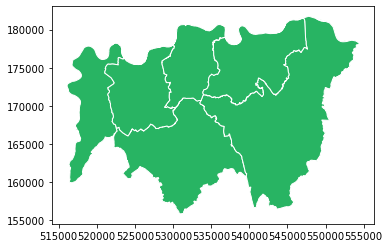

In [6]:
intersection.plot(facecolor='#28B463', edgecolor='white');

**Difference**

In [7]:
difference = gpd.overlay(border, south_river, how='difference')

In [8]:
difference.head()

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,Havering and Redbridge GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,1,1,112074,41452,E32000009,17089.120,215.025,VA,CIVIL VOTING AREA,None,None,"POLYGON ((551329.848 179223.210, 551325.201 17..."
2,Bexley and Bromley GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,3,3,112066,41448,E32000002,21444.820,373.731,VA,CIVIL VOTING AREA,None,None,"MULTIPOLYGON (((553318.724 178598.531, 553382...."
3,South West GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,4,4,112076,41453,E32000013,15259.573,198.064,VA,CIVIL VOTING AREA,None,None,"MULTIPOLYGON (((523299.645 177410.580, 523300...."
4,Ealing and Hillingdon GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,5,5,112054,41442,E32000006,17124.643,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((504288.900 193543.098, 504292.998 19..."
5,Brent and Harrow GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,6,6,112060,41445,E32000003,9370.064,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((517376.114 194089.315, 517378.181 19..."


* Let’s plot our data and see what we have:

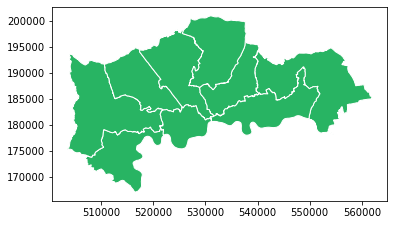

In [9]:
difference.plot(facecolor='#28B463', edgecolor='white');

**Union**

In [10]:
union = gpd.overlay(intersection, difference, how='union')

In [11]:
union.head()

,NAME_1,AREA_CODE_1,DESCRIPTIO_1,FILE_NAME_1,NUMBER_1,NUMBER0_1,POLYGON_ID_1,UNIT_ID_1,CODE_1,HECTARES_1,...,POLYGON_ID_2,UNIT_ID_2,CODE_2,HECTARES_2,AREA_2,TYPE_CODE_2,DESCRIPT0_2,TYPE_COD0_2,DESCRIPT1_2,geometry
0,Havering and Redbridge GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,1.0,1.0,112074.0,41452.0,E32000009,17089.120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((552057.328 178434.366, 552047...."
1,Croydon and Sutton GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,2.0,2.0,112056.0,41443.0,E32000005,13033.641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((531409.308 171042.621, 531439.333 17..."
2,Bexley and Bromley GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,3.0,3.0,112066.0,41448.0,E32000002,21444.820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((549944.025 181074.392, 549992.231 18..."
3,South West GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,4.0,4.0,112076.0,41453.0,E32000013,15259.573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((522034.141 178039.708, 522044...."
4,Lambeth and Southwark GL Assembly Const,LAC,Greater London Authority Assembly Constituency,GREATER_LONDON_AUTHORITY,8.0,8.0,112062.0,41446.0,E32000010,5716.068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((535280.948 177955.306, 535280.821 17..."


* Let’s plot our data and see what we have:

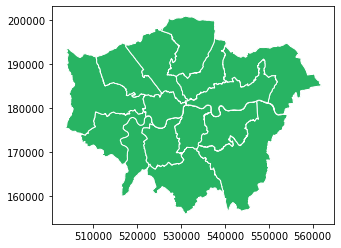

In [12]:
union.plot(facecolor='#28B463', edgecolor='white');

As you can see, that was how we make intersection, difference and union in overlay analysis in Python. 

However, it is not yet done to answer our question above. We are looking for the number and location of bicycle theft in the South part of London based on the data from the Metropolitan Police Service. The data is `data/bicycle-theft.csv`, and it has to be convert to a `GeoDataFrame` for overlay analysis.

**Practical exercise: Bicycle Theft in London**

* Let's first read the data into Python using `pandas.read_csv()` to read `.csv` -file.

In [13]:
# import necessary module
import pandas as pd

# Set file paths
bicycle_fp = "data/bicycle-theft.csv"

# Read files
bicycle = pd.read_csv(bicycle_fp)
bicycle.head()

,latitude,longitude
0,51.552200,0.153621
1,51.545110,0.165546
2,51.536326,0.076951
3,51.535612,0.079154
4,51.537440,0.080059


* Create a point geometry of bicycle theft by using `Point()` from Shapely and `gpd.GeoDataFrame()`

In [14]:
# Since we will create Points, so we will use Point function from Shapely
from shapely.geometry import Point

# Create an empty list
point_geo = []

# A loop for creating point geometry
for i,j in zip(bicycle.longitude, bicycle.latitude):
    
    # make point geometry using Point function
    point = Point(i,j)
    
    # locate all the result in the empty list created above
    point_geo.append(point)

* Now we have a list of point geometry, but it is still a list not a geodataframe. To be able to conduct analysis, we have to convert a list to a `GeoDataFrame` which will contain a proper coordinate system and so forth. Because the latitude and longitude are in decimal degree, the crs should be `epsg:4326` which is the world coordinate system - WGS 84. 

* You can also determine the crs from latitude and longitude by importing them to Google Earth Pro and save it as a kmz file. After that, by import this kmz file to QGIS, you can clearly see its original crs. 

In [15]:
from pyproj import CRS

# Create a geopandas dataframe
wgs84 = CRS.from_epsg(4326)
geo_bicycle = gpd.GeoDataFrame({'geometry':point_geo}, crs=wgs84)
geo_bicycle.head()

,geometry
0,POINT (0.15362 51.55220)
1,POINT (0.16555 51.54511)
2,POINT (0.07695 51.53633)
3,POINT (0.07915 51.53561)
4,POINT (0.08006 51.53744)


<AxesSubplot:>

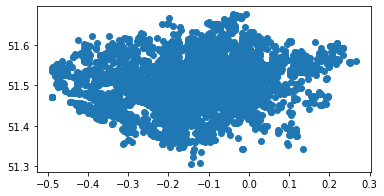

In [16]:
geo_bicycle.plot()

In [17]:
# Check if the crs of geo_bicycle is consistent with others'.
assert geo_bicycle.crs == border.crs, "CRS are not the same between layers!"

C:\Users\a9418\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


AssertionError: CRS are not the same between layers!

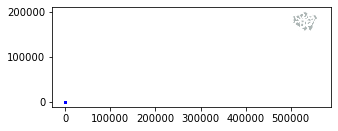

In [18]:
# Create plot to view the geometry location when the crs are different
fig, ax = plt.subplots(figsize = (5,5))
border.plot(ax = ax, facecolor='#ADB6B5', edgecolor='white')
geo_bicycle.plot(ax = ax, markersize = 0.2, color='blue')
plt.show();

* Since the crs are not consistent with each other, let's change its original crs to fit with others' crs.

In [19]:
# Re-project new crs
geo_bicycle = geo_bicycle.to_crs(border.crs)
geo_bicycle.crs

C:\Users\a9418\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


{'init': 'epsg:27700'}

In [20]:
# Check if the crs of geo_bicycle is consistent with others'.
assert geo_bicycle.crs == border.crs, "CRS are not the same between layers!"

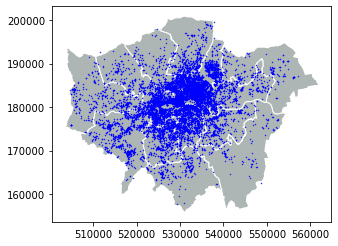

In [21]:
# Create plot to view the geometry location when the crs are the same
fig, ax = plt.subplots(figsize = (5,5))
border.plot(ax = ax, facecolor='#ADB6B5', edgecolor='white')
geo_bicycle.plot(ax = ax, markersize = 0.2, color='blue')
plt.show();

* Great! Everything is okay, right now! Let's see the location of bicycle theft in a map.

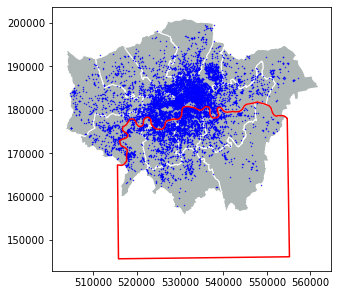

In [22]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(5,7))

# Plot the layers
border.plot(ax=ax, facecolor='#ADB6B5', edgecolor='white')
geo_bicycle.plot(ax=ax, markersize = 0.2, color='blue')
south_river.plot(ax=ax, facecolor='None', edgecolor='red', linewidth = 1.5)

plt.show();

In [23]:
geo_bicycle.to_file('result/resut.shp')

* As we can see, there are a lot of bicycle theft in the South part of London. Let's use `overlay()` to extract the location points inside the polygon based on `intersection` method.

In [24]:
# Clip the points inside the red polygon
bicycle_south = gpd.overlay(border, south_river, how='intersection')

* Let's see the number of bicycle theft in the South of London

In [25]:
print('The number of bicycle theft in southern London is:', len(bicycle_south),'bikes.')

The number of bicycle theft in southern London is: 9 bikes.


* Let's plot 3490 location in a map

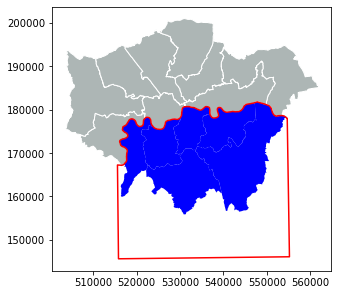

In [26]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(5,7))

# Plot the layers
border.plot(ax=ax, facecolor='#ADB6B5', edgecolor='white')
bicycle_south.plot(ax=ax, markersize = 0.2, color='blue')
south_river.plot(ax=ax, facecolor='None', edgecolor='red', linewidth = 1.5)

plt.show();

* It's time to save the result to a GeoJSON file that is commonly used file format nowadays for storing spatial data.

In [27]:
# set output path
outfp = 'result/bicycle_south.shp'

# export to GeoJSON
bicycle_south.to_file(outfp)

### b. Data aggregation

Data aggregation is very uselful when you want to combine or merge geometries together based on its similarity; for example, grouping the same type of fishes, building, region and other similar categories. As in our case, we are going to categorize the region of New York into East, West, Central and Long Island by zone in the column `NYSP_ZONE`.

For doing the aggregation we will use a function called `dissolve()` that takes as input from the column that will be used for conducting the aggregation:

* Let's first read the data

In [28]:
# Set filepath
fp = "data/NY_counties_shoreline.geojson"

# Read file using gpd.read_file()
ny_state = gpd.read_file(fp)

ny_state

,NAME,ABBREV,GNIS_ID,FIPS_CODE,SWIS,NYSP_ZONE,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,NYC,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry
0,Albany,ALBA,974099,36001,010000,East,292594,294565,304204,0,None,None,N,532.791779,2017-11-10,166077.834242,1.379924e+09,"MULTIPOLYGON (((608219.061 4737612.320, 608193..."
1,Allegany,ALLE,974100,36003,020000,West,50470,49927,48946,0,None,None,N,1035.209131,2019-04-26,210499.339279,2.681179e+09,"MULTIPOLYGON (((250193.017 4712087.456, 250192..."
2,Bronx,BRON,974101,36005,600000,Long Island,1203789,1332650,1385108,0,None,None,Y,42.313958,2019-10-04,110631.250768,1.095926e+08,"MULTIPOLYGON (((593060.323 4516716.000, 593002..."
3,Broome,BROO,974102,36007,030000,Central,212160,200536,200600,0,None,None,N,715.287465,2019-04-26,227933.332021,1.852586e+09,"MULTIPOLYGON (((465447.405 4671514.322, 465436..."
4,Cattaraugus,CATT,974103,36009,040000,West,84234,83955,80317,0,None,None,N,1324.309219,2019-04-26,276084.505560,3.429945e+09,"MULTIPOLYGON (((215534.406 4715146.842, 215536..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Wyoming,WYOM,974158,36121,560000,West,42507,43424,42155,0,None,None,N,596.822633,2018-09-20,176096.925232,1.545764e+09,"MULTIPOLYGON (((217004.051 4751905.154, 217012..."
58,Yates,YATE,974159,36123,570000,Central,22810,24621,25348,0,None,None,N,375.771539,2018-02-08,141535.638713,9.732438e+08,"MULTIPOLYGON (((338694.813 4736525.498, 338999..."
59,Madison,MADI,974125,36053,250000,Central,69120,69441,73442,0,None,None,N,660.767520,2018-07-18,256920.383650,1.711380e+09,"MULTIPOLYGON (((428112.869 4778465.622, 428112..."
60,Oneida,ONEI,974131,36065,300000,Central,250836,235469,234878,0,None,None,N,1257.212143,2018-03-09,307349.034135,3.256165e+09,"MULTIPOLYGON (((482676.562 4747513.488, 482378..."


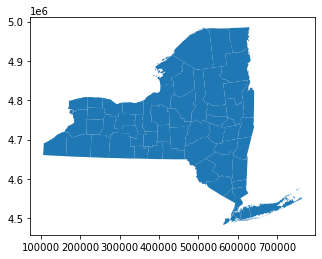

In [29]:
# Plot geometry
ny_state.plot();

If we look at column `NYSP_ZONE`, each geometry belongs to different zone. Sometimes, there are so many categories in a long list. Then it will be hard to observe every row. Therefore, in order to quickly check how many categories and what they are in each columns, we can just simply use function called `.unique()`.

* Now, let's check the categories in column `NYSP_ZONE`

In [30]:
# check categories in column
print(ny_state['NYSP_ZONE'].unique())

['East' 'West' 'Long Island' 'Central']


In [31]:
# dissolve polygon based on zone
polygon = ny_state.dissolve(by='NYSP_ZONE')
polygon

,geometry,NAME,ABBREV,GNIS_ID,FIPS_CODE,SWIS,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,NYC,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area
NYSP_ZONE,,,,,,,,,,,,,,,,,
Central,"MULTIPOLYGON (((387917.657 4859852.977, 387818...",Broome,BROO,974102,36007,030000,212160,200536,200600,0,None,None,N,715.287465,2019-04-26,227933.332021,1.852586e+09
East,"MULTIPOLYGON (((610809.635 4533652.000, 610804...",Albany,ALBA,974099,36001,010000,292594,294565,304204,0,None,None,N,532.791779,2017-11-10,166077.834242,1.379924e+09
Long Island,"MULTIPOLYGON (((580478.885 4490937.000, 580407...",Bronx,BRON,974101,36005,600000,1203789,1332650,1385108,0,None,None,Y,42.313958,2019-10-04,110631.250768,1.095926e+08
West,"MULTIPOLYGON (((181132.417 4760968.000, 181499...",Allegany,ALLE,974100,36003,020000,50470,49927,48946,0,None,None,N,1035.209131,2019-04-26,210499.339279,2.681179e+09


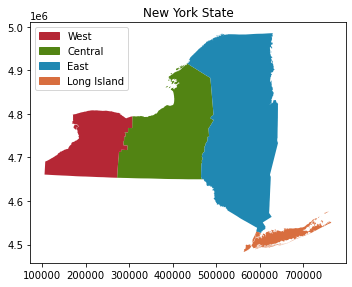

In [32]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(5,5))
color = ['#528413', '#2088B2', '#D86E3F', '#B52735']

# Plot boundary
polygon['geometry'].plot(ax=ax, color= color)

# Add legend
plt.legend(loc=2, handles=[Patch(color='#B52735', label='West'), 
                            Patch(color='#528413', label='Central'),
                            Patch(color='#2088B2', label='East'),
                            Patch(color='#D86E3F', label='Long Island')])

plt.title('New York State')
plt.tight_layout()

As you can see, we have merged 62 geometries into 4 geometries based on regions.

---

#### 2. Data classification

Data classification is a common method in GIS to add symbology to the data based on specific criteria or map classifiers. The well-known map classifiers in GIS include Equal Count (Quantile), Equal Interval, Logarithmic Scale, etc. Each classifier is described in [Data classification methods](https://pro.arcgis.com/en/pro-app/latest/help/mapping/layer-properties/data-classification-methods.htm).

In Python, we will use `Pysal`-module which is an extensive library including various functions and tools for spatial data analysis. This module includes various classifiers for data visualization. The classifiers in `Pysal`-module are as follows:

* Box_Plot
* Equal_Interval
* HeadTail_Breaks
* Jenks_Caspall
* Jenks_Caspall_Forced
* Jenks_Caspall_Sampled
* Max_P_Classifier
* Maximum_Breaks
* Natural_Breaks
* Quantiles
* Percentiles
* Std_Mean
* User_Defined

Check further details in [Source code for mapclassify.classifiers](https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html)

In this section, we use the data of US COVID-19 Daily Cases by counties from [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HIDLTK) to classify data based on ready-made classifiers in `Pysal`-module and self-made classifier to visualize the data features.

#### a. Pysal classifier

* Let's start first by importing the data

In [33]:
# import necessary module
import geopandas as gpd

# input filepath
fp = 'data/Covid19_confirmed_cases_for_US_counties.shp'

# read data
dataframe = gpd.read_file(fp)

# check the number of counties
print('There are',len(dataframe),'counties.')

# check the head row in dataframe
dataframe.head()

There are 3108 counties.


,County Nam,State,POP10,HHD10,covid,geometry
0,Autauga County,AL,54571.0,20221.0,6879.0,"POLYGON ((-86.90310 32.54063, -86.90312 32.540..."
1,Baldwin County,AL,182265.0,73180.0,20847.0,"POLYGON ((-87.99069 30.55550, -87.99051 30.560..."
2,Barbour County,AL,27457.0,9820.0,2296.0,"POLYGON ((-85.42982 32.04599, -85.42986 32.046..."
3,Bibb County,AL,22915.0,7953.0,2584.0,"POLYGON ((-87.31227 33.08623, -87.31218 33.087..."
4,Blount County,AL,57322.0,21578.0,6571.0,"POLYGON ((-86.74919 33.99760, -86.74903 33.997..."


<AxesSubplot:>

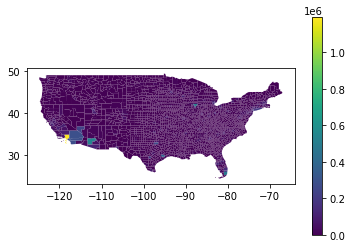

In [34]:
# plot covid confirmed case
dataframe.plot(column="covid", legend=True)

As you can see from the dataframe and the map, there are more than 3000 counties with the information about covid confirmed cases, population and households, while the data is plotted by default without specific classification. Hence, by using ready-made classifiers from `Pysal`-module, we will be able to create classes for plotting.

* Plot covid confirmed case with different classifier

In [35]:
# import necessary module
import mapclassify

StdMean                         

        Interval           Count
--------------------------------
(      -inf,  -61551.10] |     0
( -61551.10,  -25738.23] |     0
( -25738.23,   45887.53] |  2971
(  45887.53,   81700.40] |    69
(  81700.40, 1190603.00] |    68

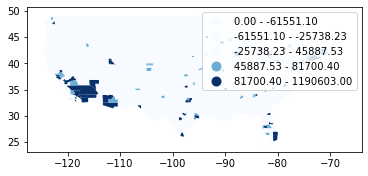

In [36]:
# Standard Deviation classifier
dataframe.plot(column="covid", scheme="Std_Mean", k=5, cmap = 'Blues', legend=True);

# Table of classification
mapclassify.StdMean(y=dataframe['covid'])

EqualInterval                   

        Interval           Count
--------------------------------
[      0.00,  238120.60] |  3094
( 238120.60,  476241.20] |    10
( 476241.20,  714361.80] |     3
( 714361.80,  952482.40] |     0
( 952482.40, 1190603.00] |     1

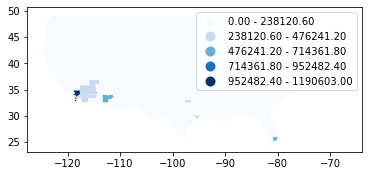

In [37]:
# Equal interval classifier
dataframe.plot(column="covid", scheme="Equal_Interval", k=5, cmap = 'Blues', legend=True);

# Table of classification
mapclassify.EqualInterval(y=dataframe['covid'], k=5)

Quantiles                       

        Interval           Count
--------------------------------
[      0.00,     815.00] |   623
(    815.00,    1771.60] |   620
(   1771.60,    3557.20] |   622
(   3557.20,    8737.20] |   621
(   8737.20, 1190603.00] |   622

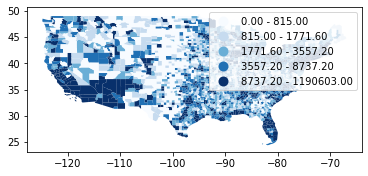

In [38]:
# Equal count (Quantiles) classifier
dataframe.plot(column="covid", scheme="Quantiles", k=5, cmap = 'Blues', legend=True);

# Table of classification
mapclassify.Quantiles(y=dataframe['covid'], k=5)

NaturalBreaks                   

        Interval           Count
--------------------------------
[      0.00,   37041.00] |  2929
(  37041.00,  150249.00] |   160
( 150249.00,  297315.00] |    14
( 297315.00,  534430.00] |     4
( 534430.00, 1190603.00] |     1

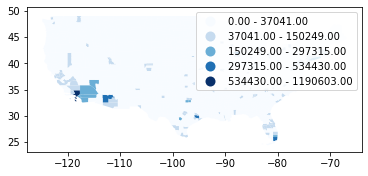

In [39]:
# Natural break classifier
dataframe.plot(column="covid", scheme="Natural_Breaks", k=5, cmap = 'Blues', legend=True);

# Table of classification
mapclassify.NaturalBreaks(y=dataframe['covid'], k=5)

BoxPlot                         

        Interval           Count
--------------------------------
(      -inf,   -7016.00] |     0
(  -7016.00,    1044.25] |   777
(   1044.25,    2501.50] |   777
(   2501.50,    6417.75] |   777
(   6417.75,   14478.00] |   356
(  14478.00, 1190603.00] |   421

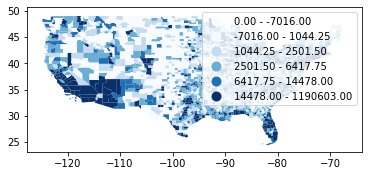

In [40]:
# Box plot classifier
dataframe.plot(column="covid", scheme="Box_Plot", k=5, cmap = 'Blues', legend=True);

# Table of classification
mapclassify.BoxPlot(y=dataframe['covid'])

* Plot population, household and covid with `Quantiles` classifier

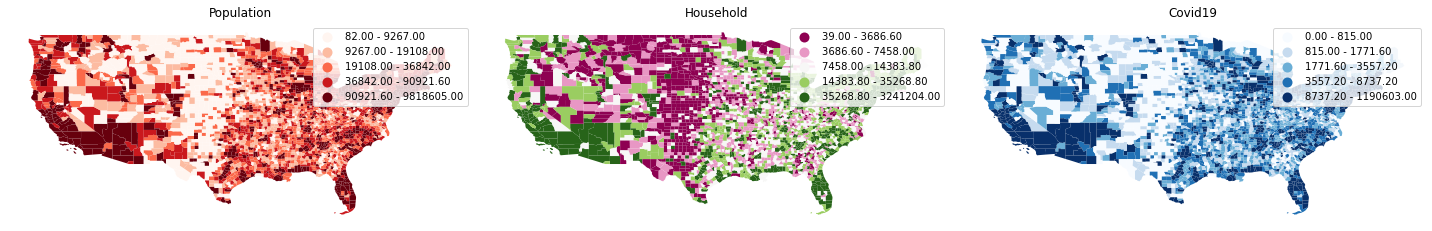

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize subplots 
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(20, 10), sharey=True)

# Equal count (Quantiles) classifier
dataframe.plot(ax=ax1, column="POP10", scheme="Quantiles", k=5, cmap = 'Reds', legend=True);
dataframe.plot(ax=ax2, column="HHD10", scheme="Quantiles", k=5, cmap = 'PiYG', legend=True);
dataframe.plot(ax=ax3, column="covid", scheme="Quantiles", k=5, cmap = 'Blues', legend=True);

# Add titles
ax1.set_title("Population")
ax2.set_title("Household")
ax3.set_title("Covid19")

# Remove axis
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

plt.tight_layout()
plt.show();

**Assign classes to dataframe (Additional)**

By using `make()` function we can take the number of desired classes from classifier as input parameter.

In [42]:
# Create a Natural Breaks classifier
classifier = mapclassify.Quantiles.make(k=5)

# Rename the column so that we know that it was classified with natural breaks
dataframe['qt_covid'] = dataframe[['covid']].apply(classifier)

# Check the original values and classification
dataframe[['covid', 'qt_covid']].head()

,covid,qt_covid
0,6879.0,3
1,20847.0,4
2,2296.0,2
3,2584.0,2
4,6571.0,3


#### b. Custom classifer

The purpose of this section is to classify the data feature based on criteria which can be whatever, such as:
    
```
    1. the households are less than 7500

    AND

    2. confirmed covid cases are less than 5000
    ------------------------------------------------------

    IF TRUE: ==> The areas are less dangerous.
    IF NOT TRUE: ==> The areas are very dangerous.
```
    

* Let’s create a fuction called `custom_classifier` that takes two above criteria into account:

In [43]:
def custom_classifier(row, src_col1, src_col2, threshold1, threshold2, output_col):
   # If the value in src_col1 is LOWER than the threshold1 value AND the value in src_col2 is LOWER than the threshold2 value, give value 1, otherwise give 0
    
   if row[src_col1] < threshold1 and row[src_col2] < threshold2:
       row[output_col] = 1
    
   # If area of input geometry is higher than the threshold value update with value 1
   else:
       row[output_col] = 0

   # Return the updated row
   return row

* Apply the function we created to the dataframe.

In [44]:
# Create column for the classification results
dataframe["dangerous_area"] = None

# Use the function
result = dataframe.apply(custom_classifier, src_col1='HHD10', src_col2='covid', threshold1=7500, threshold2=5000, output_col="dangerous_area", axis=1)

# See the first rows
result

,County Nam,State,POP10,HHD10,covid,geometry,qt_covid,dangerous_area
0,Autauga County,AL,54571.0,20221.0,6879.0,"POLYGON ((-86.90310 32.54063, -86.90312 32.540...",3,0
1,Baldwin County,AL,182265.0,73180.0,20847.0,"POLYGON ((-87.99069 30.55550, -87.99051 30.560...",4,0
2,Barbour County,AL,27457.0,9820.0,2296.0,"POLYGON ((-85.42982 32.04599, -85.42986 32.046...",2,0
3,Bibb County,AL,22915.0,7953.0,2584.0,"POLYGON ((-87.31227 33.08623, -87.31218 33.087...",2,0
4,Blount County,AL,57322.0,21578.0,6571.0,"POLYGON ((-86.74919 33.99760, -86.74903 33.997...",3,0
...,...,...,...,...,...,...,...,...
3103,Sublette County,WY,10247.0,3906.0,765.0,"POLYGON ((-109.49667 42.26333, -109.49213 42.2...",0,1
3104,Sweetwater County,WY,43806.0,16475.0,4159.0,"POLYGON ((-111.04910 44.13237, -111.04911 44.1...",3,0
3105,Teton County,WY,21294.0,8973.0,3719.0,"POLYGON ((-110.60681 40.99626, -110.60690 40.9...",3,0
3106,Uinta County,WY,21118.0,7668.0,2158.0,"POLYGON ((-107.63350 43.64635, -107.63353 43.6...",2,0


In [45]:
# Get value counts
result['dangerous_area'].value_counts()

0    1857
1    1251
Name: dangerous_area, dtype: int64

There seems to be 1857 less degerous areas and 1251 very dangerous area from our classification.

* Let's see where those area are located.

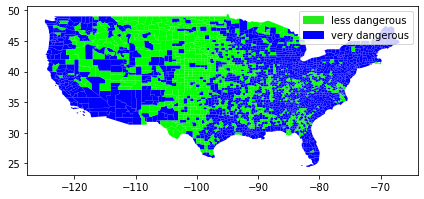

In [46]:
# Plot
result.plot(column="dangerous_area", cmap = 'brg', linewidth=0);

# Add legend
plt.legend(loc='best', handles=[Patch(color='#25EB1C', label='less dangerous'), 
                            Patch(color='blue', label='very dangerous')])

# Use tight layour
plt.tight_layout()

---